In [1]:
%matplotlib inline

In [2]:
import glob
import json
import re
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def load_data(wildname):
    results = []
    for name in glob.glob(wildname):
        with open(name) as sr:
            lines = sr.read().split('\n')
            config = [line for line in lines if re.match(r'^\D', line)]
            result = min([
                (float(re.search(r'error rate: ([\d.]+)', line).group(1)), re.search(r'epoch (\d+)', line).group(1))
                for line in lines if 'error rate:' in line
            ])
            results.append({'config': config, 'epoch': result[1], 'result': result[0]})
    return pd.DataFrame(results)

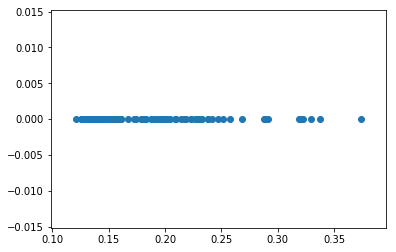

In [4]:
dbow = load_data('results/logreg_dbow_imdb_val/*.txt')
plt.scatter(dbow['result'], np.zeros(len(dbow)))

In [5]:
i = dbow['result'].argmin()
print('\n'.join(dbow['config'][i]))
print(f'epoch {dbow["epoch"][i]}: {dbow["result"][i]}')

imdb val dbow '{"embedding_size": 400, "min_freq": 0, "sample": 0.1, "lr": 0.001, "batch_size": 2048, "epoch_size": 12, "save_path": "__cache__/tf/55d4bb2f-9809-40c2-9038-c1a26b8f2f51"}'
imdb val dbow '{"embedding_size": 400, "min_freq": 0, "sample": 0.1, "lr": 0.0001, "batch_size": 2048, "epoch_size": 18, "save_path": "__cache__/tf/1958c896-47f4-4135-a772-d53d6898b14f", "train_path": "__cache__/tf/55d4bb2f-9809-40c2-9038-c1a26b8f2f51"}'
imdb val nn '{"train_paths": ["__cache__/tf/55d4bb2f-9809-40c2-9038-c1a26b8f2f51"], "test_paths": ["__cache__/tf/1958c896-47f4-4135-a772-d53d6898b14f"], "layer_sizes": [2], "lr": 0.01, "batch_size": 2048, "epoch_size": 100}
epoch 22: 0.121522


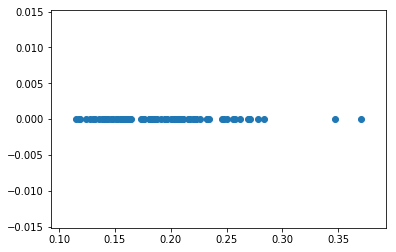

In [6]:
dbow_sg = load_data('results/logreg_dbow_sg_imdb_val/*.txt')
plt.scatter(dbow_sg['result'], np.zeros(len(dbow_sg)))

In [7]:
i = dbow_sg['result'].argmin()
print('\n'.join(dbow_sg['config'][i]))
print(f'epoch {dbow_sg["epoch"][i]}: {dbow_sg["result"][i]}')

imdb val dbow '{"sg": 6, "embedding_size": 400, "min_freq": 2, "sample": 1, "lr": 0.0005, "batch_size": 2048, "epoch_size": 34, "save_path": "__cache__/tf/e0215b29-7aa1-473e-97fd-7c3c42bd2a06"}'
imdb val dbow '{"sg": 6, "embedding_size": 400, "min_freq": 2, "sample": 1, "lr": 0.0001, "batch_size": 2048, "epoch_size": 29, "save_path": "__cache__/tf/336320c2-23d5-4259-b0ad-d5a7038d1594", "train_path": "__cache__/tf/e0215b29-7aa1-473e-97fd-7c3c42bd2a06"}'
imdb val nn '{"train_paths": ["__cache__/tf/e0215b29-7aa1-473e-97fd-7c3c42bd2a06"], "test_paths": ["__cache__/tf/336320c2-23d5-4259-b0ad-d5a7038d1594"], "layer_sizes": [2], "lr": 0.01, "batch_size": 2048, "epoch_size": 100}'
epoch 8: 0.115516


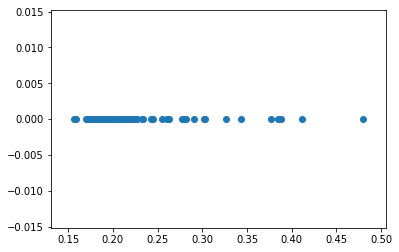

In [8]:
pvdm_mean = load_data('results/logreg_pvdm_mean_imdb_val/*.txt')
plt.scatter(pvdm_mean['result'], np.zeros(len(pvdm_mean)))

In [9]:
i = pvdm_mean['result'].argmin()
print('\n'.join(pvdm_mean['config'][i]))
print(f'epoch {pvdm_mean["epoch"][i]}: {pvdm_mean["result"][i]}')

imdb val pvdm '{"mode": "mean", "window_size": 8, "embedding_size": 150, "min_freq": 4, "sample": 0.001, "lr": 0.0025, "batch_size": 2048, "epoch_size": 26, "save_path": "__cache__/tf/0840dff1-27ca-4433-a2cb-c7bdb484cb45"}'
imdb val pvdm '{"mode": "mean", "window_size": 8, "embedding_size": 150, "min_freq": 4, "sample": 0.001, "lr": 0.0001, "batch_size": 2048, "epoch_size": 49, "save_path": "__cache__/tf/862c48a5-ed40-4b33-8af0-76458c3f4ba2", "train_path": "__cache__/tf/0840dff1-27ca-4433-a2cb-c7bdb484cb45"}'
imdb val nn '{"train_paths": ["__cache__/tf/0840dff1-27ca-4433-a2cb-c7bdb484cb45"], "test_paths": ["__cache__/tf/862c48a5-ed40-4b33-8af0-76458c3f4ba2"], "layer_sizes": [2], "lr": 0.01, "batch_size": 2048, "epoch_size": 100}
epoch 83: 0.156757


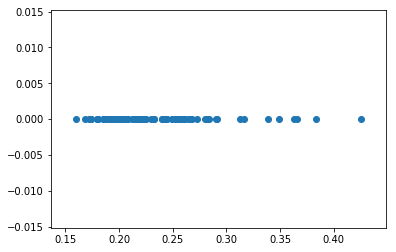

In [10]:
pvdm_concat = load_data('results/logreg_pvdm_concat_imdb_val/*.txt')
plt.scatter(pvdm_concat['result'], np.zeros(len(pvdm_concat)))

In [11]:
i = pvdm_concat['result'].argmin()
print('\n'.join(pvdm_concat['config'][i]))
print(f'epoch {pvdm_concat["epoch"][i]}: {pvdm_concat["result"][i]}')

imdb val pvdm '{"mode": "concat", "window_size": 7, "embedding_size": 50, "min_freq": 2, "sample": 0.001, "lr": 0.0005, "batch_size": 2048, "epoch_size": 46, "save_path": "__cache__/tf/97e04b31-db31-46f7-ad9d-11e884207970"}'
imdb val pvdm '{"mode": "concat", "window_size": 7, "embedding_size": 50, "min_freq": 2, "sample": 0.001, "lr": 0.00025, "batch_size": 2048, "epoch_size": 42, "save_path": "__cache__/tf/98f0a145-4d7a-4acd-902f-a7b72ced863e", "train_path": "__cache__/tf/97e04b31-db31-46f7-ad9d-11e884207970"}'
imdb val nn '{"train_paths": ["__cache__/tf/97e04b31-db31-46f7-ad9d-11e884207970"], "test_paths": ["__cache__/tf/98f0a145-4d7a-4acd-902f-a7b72ced863e"], "layer_sizes": [2], "lr": 0.01, "batch_size": 2048, "epoch_size": 100}
epoch 87: 0.15976


In [12]:
nn = load_data('results/nn_pvdm_concat_imdb_val/*.txt')
i = nn['result'].argmin()
print('\n'.join(nn['config'][i]))
print(f'epoch {nn["epoch"][i]}: {nn["result"][i]}')

imdb val nn '{"train_paths": ["__cache__/tf/pvdm_concat_imdb_train_val"], "test_paths": ["__cache__/tf/pvdm_concat_imdb_val"], "layer_sizes": [10, 2], "lr": 0.01, "batch_size": 2048, "epoch_size": 100}'
epoch 31: 0.15996


In [13]:
nn = load_data('results/nn_pvdm_mean_imdb_val/*.txt')
i = nn['result'].argmin()
print('\n'.join(nn['config'][i]))
print(f'epoch {nn["epoch"][i]}: {nn["result"][i]}')

imdb val nn '{"train_paths": ["__cache__/tf/pvdm_mean_imdb_train_val"], "test_paths": ["__cache__/tf/pvdm_mean_imdb_val"], "layer_sizes": [6, 2], "lr": 0.01, "batch_size": 2048, "epoch_size": 100}'
epoch 9: 0.156156


In [14]:
nn = load_data('results/nn_dbow_imdb_val/*.txt')
i = nn['result'].argmin()
print('\n'.join(nn['config'][i]))
print(f'epoch {nn["epoch"][i]}: {nn["result"][i]}')

imdb val nn '{"train_paths": ["__cache__/tf/dbow_imdb_train_val"], "test_paths": ["__cache__/tf/dbow_imdb_val"], "layer_sizes": [30, 2], "lr": 0.01, "batch_size": 2048, "epoch_size": 100}'
epoch 6: 0.111111
